<a href="https://colab.research.google.com/github/MeriamKalekye/data-science/blob/main/TECHNIQUE_D'APPRANTISAGE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Define the Problematic and the Goals**
## **Problem Statement:**
Telco companies often face customer churn, which is expensive and can impact revenue. The goal is to predict customer churn (binary classification) based on customer behavior and service usage data.

## **Goals:**

- Minimize customer churn by identifying potential churners early.
- Improve predictive accuracy with a robust machine-learning model.
- Compare and optimize performance across various algorithms.

# **Step 2: Identify and Collect Data**
Explore the dataset using Pandas to understand column details and data types.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

# Assuming the file is uploaded
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.info())
print(data.describe())

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contr

# **Step 2: Data Preparation**
In this step, we focus on ensuring that the data is ready for use in the machine learning model. This includes cleaning the data, normalizing numerical variables, encoding categorical features, and visualizing data distributions.

## **1. Cleaning Data and Managing Missing Values**

- The dataset doesn't have missing values as per the output you provided. Therefore, no additional steps for handling missing data are required.
- Proceed to cleaning the data

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
data.columns = data.columns.str.strip()


In [4]:
print(data.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
if 'customerID' in data.columns:
    data = data.drop(columns=['customerID'])
else:
    print("customerID column not found.")

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
data.isnull().sum()  # Check for missing values

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [8]:
# Check for non-numeric values in the relevant columns
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = data[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(pd.to_numeric, errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill any remaining NaNs after conversion with the median
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = data[['tenure', 'MonthlyCharges', 'TotalCharges']].fillna(data[['tenure', 'MonthlyCharges', 'TotalCharges']].median())

In [9]:
# Inspect the first few rows of the relevant columns
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

# Check for any remaining NaN values
print("\nRemaining missing values:")
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum())

# Display summary statistics to confirm the data range
print("\nSummary statistics:")
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

   tenure  MonthlyCharges  TotalCharges
0       1           29.85         29.85
1      34           56.95       1889.50
2       2           53.85        108.15
3      45           42.30       1840.75
4       2           70.70        151.65

Remaining missing values:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

Summary statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [10]:
print(data['TotalCharges'].dtype)

float64


In [11]:
data.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


# **2. Normalization**
Normalize numerical features like tenure, MonthlyCharges, and TotalCharges for better performance during model training.
- **Normalization:** Numerical features like tenure, MonthlyCharges, and TotalCharges might require normalization. This is especially important when using algorithms like neural networks, which can perform better with normalized data. We will use **StandardScaler** or **MinMaxScaler** from scikit-learn to scale the numerical features.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [13]:
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean      0.449599        0.462803      0.261149
std       0.341104        0.299403      0.261397
min       0.000000        0.000000      0.000000
25%       0.125000        0.171642      0.044245
50%       0.402778        0.518408      0.159090
75%       0.763889        0.712438      0.434780
max       1.000000        1.000000      1.000000


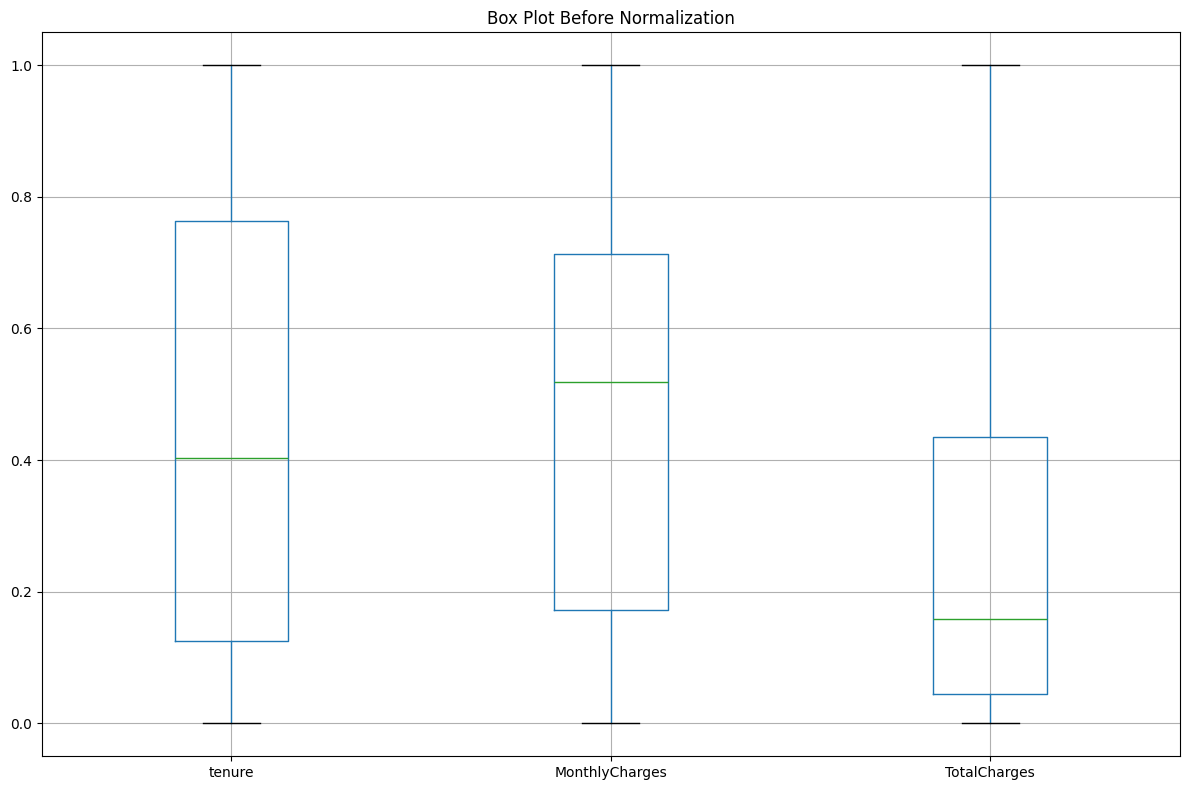

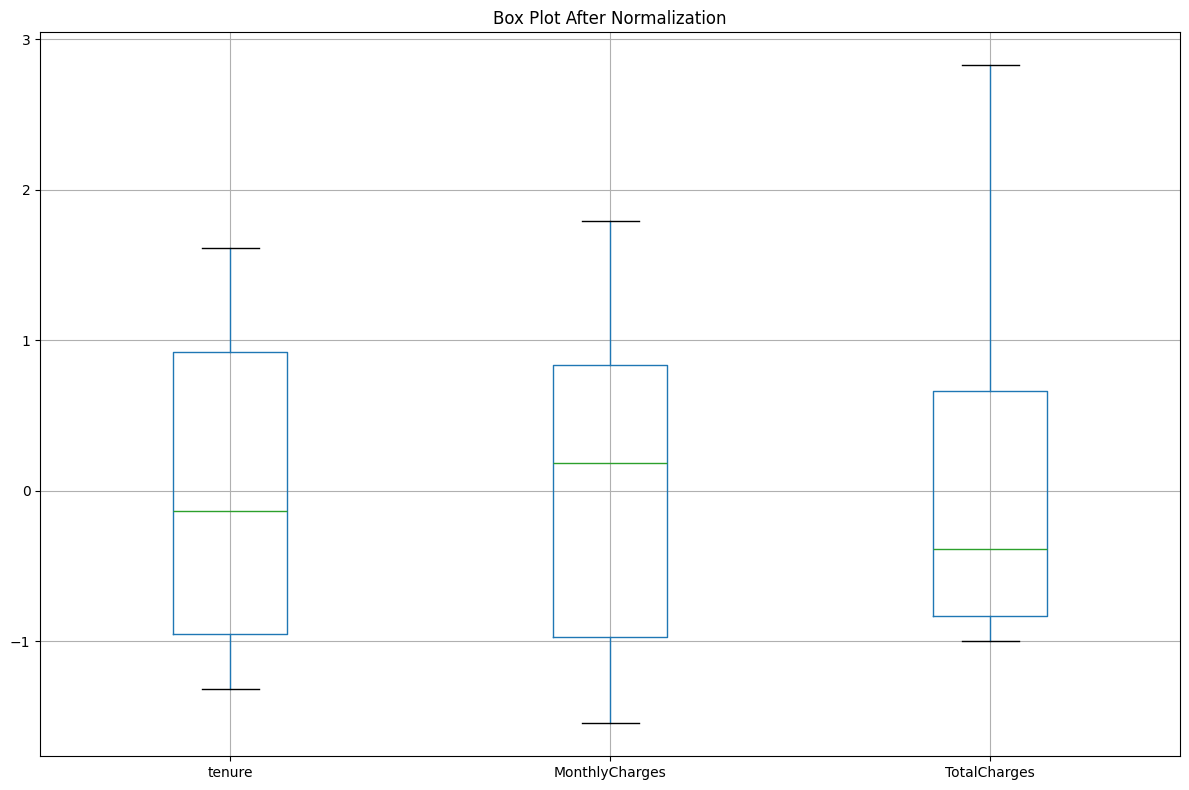

In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Box plot before normalization
data[['tenure', 'MonthlyCharges', 'TotalCharges']].boxplot(figsize=(12, 8))
plt.title('Box Plot Before Normalization')
plt.tight_layout()
plt.show()

# 2. Normalize the data
scaler = StandardScaler()
normalized_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]
normalized_data = scaler.fit_transform(normalized_data)

# 3. Box plot after normalization
normalized_df = pd.DataFrame(normalized_data, columns=['tenure', 'MonthlyCharges', 'TotalCharges'])
normalized_df.boxplot(figsize=(12, 8))
plt.title('Box Plot After Normalization')
plt.tight_layout()
plt.show()

## **3. Encoding Categorical Variables:**

- Many features in the dataset are categorical (e.g., gender, Partner, InternetService). These need to be encoded into numerical values.
- **Label Encoding**: For binary categorical features (like SeniorCitizen), you can use **LabelEncoder.**
- **One-Hot Encoding:** For multi-class categorical features (e.g., Contract, PaymentMethod), we will use **OneHotEncoder.**

In [15]:
# Check the current columns to make sure 'Churn' isn't already encoded
print(data.columns)

# Apply OneHotEncoding for the 'Churn' column if it still exists (before previous encoding)
# If the column is already encoded as 'Churn_Yes', skip this step.
if 'Churn' in data.columns:
    data = pd.get_dummies(data, columns=['Churn'], drop_first=True)

# Now, apply One-Hot Encoding for other categorical variables
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod']

# One-Hot Encoding transformation for these categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Check the result
print(data.head())

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
   SeniorCitizen    tenure  MonthlyCharges  TotalCharges  Churn_Yes  \
0              0  0.013889        0.115423      0.001275      False   
1              0  0.472222        0.385075      0.215867      False   
2              0  0.027778        0.354229      0.010310       True   
3              0  0.625000        0.239303      0.210241      False   
4              0  0.027778        0.521891      0.015330       True   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False         True           False             False   
1         True        False           False              True   
2         T

In [16]:
data.dtypes

,0
SeniorCitizen,int64
tenure,float64
MonthlyCharges,float64
TotalCharges,float64
Churn_Yes,bool
gender_Male,bool
Partner_Yes,bool
Dependents_Yes,bool
PhoneService_Yes,bool
MultipleLines_No phone service,bool


In [17]:
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean      0.449599        0.462803      0.261149
std       0.341104        0.299403      0.261397
min       0.000000        0.000000      0.000000
25%       0.125000        0.171642      0.044245
50%       0.402778        0.518408      0.159090
75%       0.763889        0.712438      0.434780
max       1.000000        1.000000      1.000000


In [18]:
data.isnull().sum()  # Check for missing values

,0
SeniorCitizen,0
tenure,0
MonthlyCharges,0
TotalCharges,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0
MultipleLines_No phone service,0


# **Step 3: Splitting the Dataset**
## **Why Splitting the Dataset is Important**
In machine learning, splitting the dataset into training, validation, and test sets is a crucial step. This ensures the model's performance is evaluated on unseen data, helping us understand its generalization capability.

- **Training Set:** 70% of the total data.
- **Temporary Set:** 30% of the total data, which will later be split into validation and test sets.


In [41]:
from sklearn.model_selection import train_test_split

X = data.drop('Churn_Yes', axis=1)  # All columns except the target
y = data['Churn_Yes']  # Target column

# First split: Training (70%) and Temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


# **Step 4: Build the Model: Neural Network for Binary Churn Prediction**
We’ll use TensorFlow/Keras to build a neural network model. We will create a simple feedforward neural network for binary classification (Churn prediction).

In [21]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

# Initialize the model
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),  # Include validation data for performance tracking
    verbose=1
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Make predictions and generate a classification report
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6415 - loss: 0.6012 - val_accuracy: 0.7765 - val_loss: 0.4468
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4442 - val_accuracy: 0.7860 - val_loss: 0.4343
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7847 - loss: 0.4513 - val_accuracy: 0.7879 - val_loss: 0.4306
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8064 - loss: 0.4267 - val_accuracy: 0.7926 - val_loss: 0.4279
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7983 - loss: 0.4225 - val_accuracy: 0.7926 - val_loss: 0.4265
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4190 - val_accuracy: 0.8002 - val_loss: 0.4225
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8073 - loss: 0.4172 - val_accuracy: 0.8021 - val_loss: 0.4234
Epoch 8/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8137 - loss: 0.4191 - val_accuracy: 0.8021 - val_

# **Decision Tree Classifier**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.82      0.82       776
        True       0.50      0.49      0.50       281

    accuracy                           0.74      1057
   macro avg       0.66      0.66      0.66      1057
weighted avg       0.73      0.74      0.73      1057



#**Decision tree classifier with XGBoost and incorporate StratifiedKFold cross-validation with ROC Curve**

Fold 1 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        81
           1       0.85      0.77      0.81        79

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160

Fold 1 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89        81
           1       0.94      0.80      0.86        79

    accuracy                           0.88       160
   macro avg       0.88      0.87      0.87       160
weighted avg       0.88      0.88      0.87       160

Fold 2 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        81
           1       0.86      0.89      0.88        79

    accuracy                           0.88       160
  

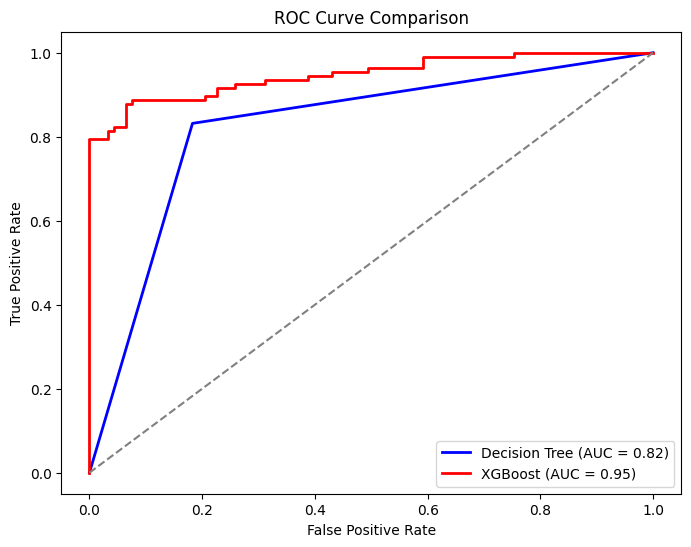

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a synthetic classification dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
decision_tree = DecisionTreeClassifier(random_state=42)
xgb_classifier = XGBClassifier(eval_metric='mlogloss', random_state=42)

# Set up StratifiedKFold cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# For storing the classification results
dt_accuracy = []
xgb_accuracy = []

# Cross-validation loop for both classifiers
for fold, (train_idx, test_idx) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train[train_idx], X_train[test_idx]
    y_train_fold, y_test_fold = y_train[train_idx], y_train[test_idx]

    # Train and evaluate Decision Tree
    decision_tree.fit(X_train_fold, y_train_fold)
    y_pred_dt = decision_tree.predict(X_test_fold)
    dt_accuracy.append(np.mean(y_pred_dt == y_test_fold))

    # Train and evaluate XGBoost
    xgb_classifier.fit(X_train_fold, y_train_fold)
    y_pred_xgb = xgb_classifier.predict(X_test_fold)
    xgb_accuracy.append(np.mean(y_pred_xgb == y_test_fold))

    # Print classification reports for each fold
    print(f"Fold {fold + 1} Decision Tree Classification Report:")
    print(classification_report(y_test_fold, y_pred_dt))

    print(f"Fold {fold + 1} XGBoost Classification Report:")
    print(classification_report(y_test_fold, y_pred_xgb))

# Calculate average accuracy across folds
print(f"Average Decision Tree Accuracy: {np.mean(dt_accuracy)}")
print(f"Average XGBoost Accuracy: {np.mean(xgb_accuracy)}")

# Plot ROC curves for both classifiers
fpr_dt, tpr_dt, _ = roc_curve(y_test, decision_tree.predict_proba(X_test)[:,1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])

roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


# **Random Forest Classifier**

In [24]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86       776
        True       0.64      0.49      0.55       281

    accuracy                           0.79      1057
   macro avg       0.74      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



# **Support Vector Machine (SVM)**

In [25]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Initialize and train the Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.91      0.87       776
        True       0.66      0.46      0.55       281

    accuracy                           0.79      1057
   macro avg       0.74      0.69      0.71      1057
weighted avg       0.78      0.79      0.78      1057



# **KMeans Clustering**

In [26]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

# KMeans is unsupervised, so we don't use y_train
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_train)

# Predict the clusters (labels) for the test set
y_pred_kmeans = kmeans_model.predict(X_test)

# Since KMeans doesn't produce accuracy, use classification report for evaluation
print("KMeans Classification Report:")
print(classification_report(y_test, y_pred_kmeans))


KMeans Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.28      0.42       776
        True       0.31      0.91      0.47       281

    accuracy                           0.45      1057
   macro avg       0.61      0.60      0.45      1057
weighted avg       0.74      0.45      0.44      1057



# **KMeans classification with XGBoost and incorporate StratifiedKFold cross-validation**

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# Assume we have a dataframe 'data' for clustering and model training
X = data.drop(columns=['Churn_Yes'])  # Features
y = data['Churn_Yes']  # Actual labels, for supervised learning in XGBoost

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Set number of clusters (adjust as needed)
kmeans_labels = kmeans.fit_predict(X)

# Use StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1

for train_index, val_index in kf.split(X, kmeans_labels):  # Use kmeans_labels as the target
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = kmeans_labels[train_index], kmeans_labels[val_index]

    # Optional: Handle class imbalance using SMOTE
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # Create DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
    dval = xgb.DMatrix(X_val, label=y_val)

    # Set parameters for XGBoost
    params = {
        'max_depth': 6,
        'eta': 0.1,
        'objective': 'multi:softmax',  # Multiclass classification
        'eval_metric': 'mlogloss',
        'num_class': len(np.unique(y_train_res))  # Set based on the number of clusters
    }

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_boost_round=100)

    # Predict and evaluate
    y_pred = model.predict(dval)
    print(f"Fold {fold_no} classification report:")
    print(classification_report(y_val, y_pred))
    fold_no += 1


Fold 1 classification report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       481
           1       1.00      1.00      1.00       305
           2       0.99      0.99      0.99       623

    accuracy                           0.99      1409
   macro avg       0.99      0.99      0.99      1409
weighted avg       0.99      0.99      0.99      1409

Fold 2 classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       481
           1       1.00      1.00      1.00       305
           2       0.98      0.99      0.99       623

    accuracy                           0.99      1409
   macro avg       0.99      0.99      0.99      1409
weighted avg       0.99      0.99      0.99      1409

Fold 3 classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       481
           1       1.00      1.00      

# **XGBoost**

In [27]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)  # Resampling training data

# Create DMatrix for XGBoost (optimized format)
dtrain = xgb.DMatrix(X_res, label=y_res)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'max_depth': 6,                  # Maximum depth of trees
    'eta': 0.1,                      # Learning rate
    'eval_metric': 'auc',            # Use AUC as evaluation metric
    'scale_pos_weight': len(y_res) / sum(y_res)  # Adjust class imbalance
}

# Train the model using XGBoost
num_boost_round = 100
model = xgb.train(params, dtrain, num_boost_round)

# Make predictions on the test set
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels

# Generate a classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))


XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.70      0.79       776
        True       0.49      0.79      0.61       281

    accuracy                           0.73      1057
   macro avg       0.70      0.75      0.70      1057
weighted avg       0.79      0.73      0.74      1057



# **Cross-Validation and SMOTE Adjustment**

In [28]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Convert to DataFrame for correct indexing
X_train_res = pd.DataFrame(X_train_res, columns=X_train.columns)  # Ensure correct columns
X_test = pd.DataFrame(X_test, columns=X_train.columns)  # Same for X_test

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_res, label=y_train_res)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost with adjusted class weights
scale_pos_weight = len(y_train_res) / sum(y_train_res)  # Adjust for class imbalance
params = {
    'max_depth': 6,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'scale_pos_weight': scale_pos_weight,
    'subsample': 0.8,  # Randomly sample 80% of the training data for each boosting round
    'colsample_bytree': 0.8  # Randomly sample 80% of the features for each tree
}

# Cross-validation setup with Stratified K-Fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV
fold_no = 1
for train_index, val_index in kf.split(X_train_res, y_train_res):
    X_train_fold, X_val_fold = X_train_res.iloc[train_index], X_train_res.iloc[val_index]
    y_train_fold, y_val_fold = y_train_res.iloc[train_index], y_train_res.iloc[val_index]

    # Train the model
    model = xgb.train(params, xgb.DMatrix(X_train_fold, label=y_train_fold), num_boost_round=100)

    # Predict and evaluate
    y_pred = model.predict(xgb.DMatrix(X_val_fold)) > 0.5
    print(f"Fold {fold_no} classification report:")
    print(classification_report(y_val_fold, y_pred))
    fold_no += 1


Fold 1 classification report:
              precision    recall  f1-score   support

       False       0.90      0.71      0.79       725
        True       0.76      0.92      0.83       724

    accuracy                           0.81      1449
   macro avg       0.83      0.81      0.81      1449
weighted avg       0.83      0.81      0.81      1449

Fold 2 classification report:
              precision    recall  f1-score   support

       False       0.90      0.69      0.78       725
        True       0.75      0.92      0.83       724

    accuracy                           0.81      1449
   macro avg       0.82      0.81      0.80      1449
weighted avg       0.82      0.81      0.80      1449

Fold 3 classification report:
              precision    recall  f1-score   support

       False       0.88      0.66      0.75       724
        True       0.73      0.91      0.81       725

    accuracy                           0.78      1449
   macro avg       0.80      0.78     

# **Combining XGBoost and Random Forest using Voting**

In [29]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Combine using soft voting (probability averaging)
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.83      0.89      0.86       776
        True       0.62      0.48      0.55       281

    accuracy                           0.79      1057
   macro avg       0.73      0.69      0.70      1057
weighted avg       0.77      0.79      0.78      1057



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:01:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 # **Voting Classifier with XGBoost and Random Forest, and incorporating cross-validation with StratifiedKFold**

In [30]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import numpy as np

# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, random_state=42)

# Combine using soft voting (probability averaging)
voting_clf = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='soft')

# Initialize StratifiedKFold for cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store the results
all_reports = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the ensemble model
    voting_clf.fit(X_train_fold, y_train_fold)

    # Predict and evaluate
    y_pred = voting_clf.predict(X_val_fold)

    # Print the classification report for this fold
    print(f"Fold {fold} classification report:")
    report = classification_report(y_val_fold, y_pred, output_dict=True)
    all_reports.append(report)
    print(classification_report(y_val_fold, y_pred))

# Calculate and print the average results across all folds
avg_report = np.mean([report['accuracy'] for report in all_reports])
print(f"Average accuracy over 5 folds: {avg_report:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:03:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 1 classification report:
              precision    recall  f1-score   support

       False       0.83      0.90      0.86       725
        True       0.64      0.47      0.54       261

    accuracy                           0.79       986
   macro avg       0.73      0.69      0.70       986
weighted avg       0.78      0.79      0.78       986



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:03:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 2 classification report:
              precision    recall  f1-score   support

       False       0.84      0.90      0.86       725
        True       0.64      0.51      0.57       261

    accuracy                           0.79       986
   macro avg       0.74      0.70      0.72       986
weighted avg       0.78      0.79      0.79       986



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:03:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3 classification report:
              precision    recall  f1-score   support

       False       0.84      0.89      0.86       724
        True       0.64      0.54      0.59       262

    accuracy                           0.80       986
   macro avg       0.74      0.72      0.73       986
weighted avg       0.79      0.80      0.79       986



/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:03:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 4 classification report:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       724
        True       0.61      0.48      0.54       262

    accuracy                           0.78       986
   macro avg       0.72      0.69      0.70       986
weighted avg       0.77      0.78      0.77       986

Fold 5 classification report:
              precision    recall  f1-score   support

       False       0.84      0.91      0.87       724
        True       0.67      0.54      0.60       262

    accuracy                           0.81       986
   macro avg       0.76      0.72      0.74       986
weighted avg       0.80      0.81      0.80       986

Average accuracy over 5 folds: 0.79


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:03:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **Step 5: Model Evaluation:**
After training the model, we evaluate its performance on the **test set**.

- **1. Performance Metrics Calculation:**
The essential performance metrics for classification tasks are **precision, recall, F1-score, and accuracy**. These metrics provide insight into how well the model is classifying positive and negative classes.

- **2. Using ROC Curve**  to evaluate the performance of the model across various decision thresholds, which is especially useful for handling class imbalances and comparing model performance without being biased by accuracy alone.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
              precision    recall  f1-score   support

       False       0.84      0.87      0.86       776
        True       0.60      0.55      0.58       280

    accuracy                           0.79      1056
   macro avg       0.72      0.71      0.72      1056
weighted avg       0.78      0.79      0.78      1056



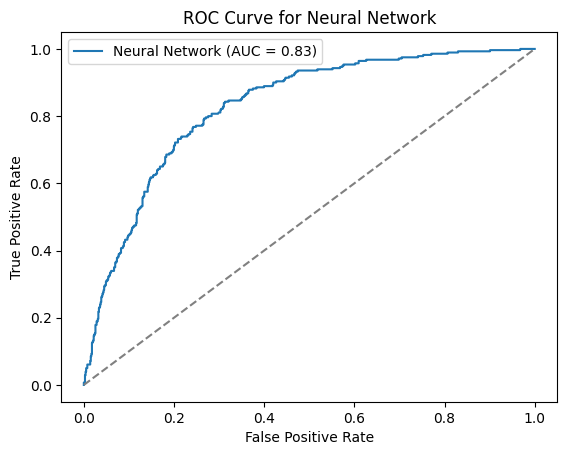

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.82      0.81      0.82       776
        True       0.49      0.51      0.50       280

    accuracy                           0.73      1056
   macro avg       0.66      0.66      0.66      1056
weighted avg       0.73      0.73      0.73      1056



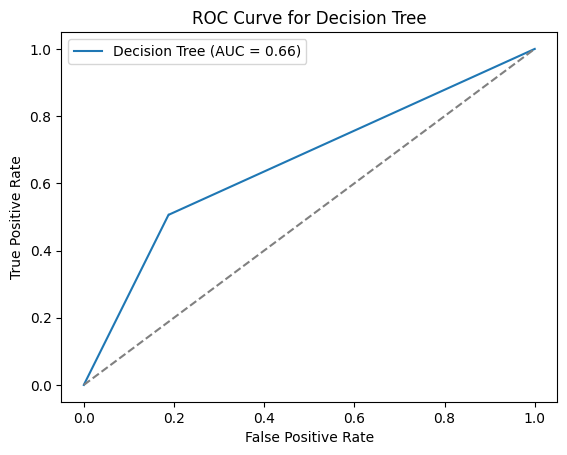

Model: Random Forest
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       776
        True       0.62      0.51      0.56       280

    accuracy                           0.79      1056
   macro avg       0.73      0.70      0.71      1056
weighted avg       0.78      0.79      0.78      1056



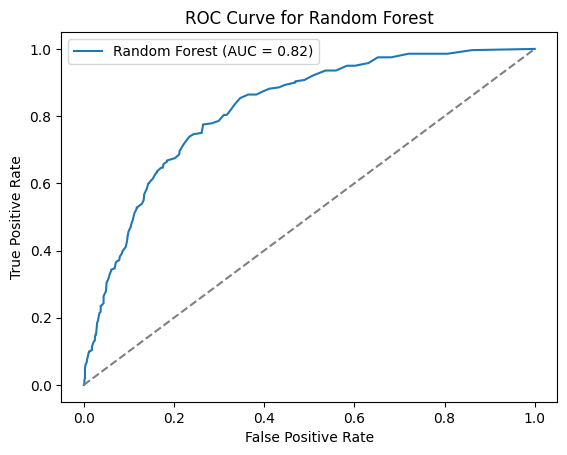

Model: SVM
              precision    recall  f1-score   support

       False       0.84      0.89      0.86       776
        True       0.63      0.53      0.58       280

    accuracy                           0.79      1056
   macro avg       0.73      0.71      0.72      1056
weighted avg       0.78      0.79      0.79      1056



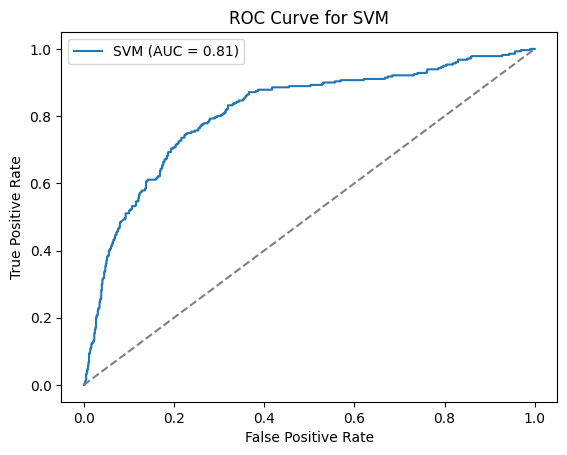

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

       False       0.83      0.87      0.85       776
        True       0.59      0.51      0.55       280

    accuracy                           0.78      1056
   macro avg       0.71      0.69      0.70      1056
weighted avg       0.77      0.78      0.77      1056



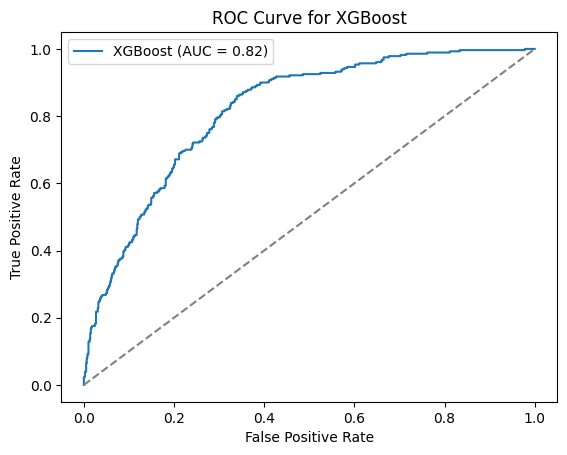

Model: KMeans
              precision    recall  f1-score   support

       False       0.68      0.74      0.71       776
        True       0.07      0.05      0.06       280

    accuracy                           0.56      1056
   macro avg       0.38      0.40      0.38      1056
weighted avg       0.52      0.56      0.54      1056

            Model  Accuracy  Precision    Recall  F1-Score       AUC
0  Neural Network  0.785038   0.603922  0.550000  0.575701  0.827791
2   Random Forest  0.787879   0.621739  0.510714  0.560784  0.821935
4         XGBoost  0.775568   0.589212  0.507143  0.545106  0.818416
3             SVM  0.792614   0.628692  0.532143  0.576402  0.811711
1   Decision Tree  0.731061   0.493056  0.507143  0.500000  0.659182
5          KMeans  0.555871   0.068493  0.053571  0.060120       NaN


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:47:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Test Set Performance:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86       776
        True       0.63      0.51      0.56       281

    accuracy                           0.79      1057
   macro avg       0.73      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057

Final Test AUC: 0.810


In [42]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, accuracy_score
)
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin

# Example KMeans wrapper
class KMeansClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=2):
        self.kmeans = KMeans(n_clusters=n_clusters)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def predict(self, X):
        return self.kmeans.predict(X)

# Data preparation
X = data.drop('Churn_Yes', axis=1)  # All columns except the target
y = data['Churn_Yes']  # Target column

# First split: Training (70%) and Temporary (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Models to evaluate
models = [
    ("Neural Network", MLPClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVM", SVC(probability=True, random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
    ("KMeans", KMeansClassifier(n_clusters=2))
]

# Evaluation results
results = []

for name, model in models:
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_val)  # Predictions
    y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)

    # Metrics calculation
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='binary', zero_division=0)
    recall = recall_score(y_val, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_val, y_pred, average='binary', zero_division=0)
    auc = roc_auc_score(y_val, y_proba) if hasattr(model, "predict_proba") else None

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

    # Classification report
    print(f"Model: {name}")
    print(classification_report(y_val, y_pred))

    # Plot ROC curve
    if auc:
        fpr, tpr, _ = roc_curve(y_val, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve for {name}")
        plt.legend(loc="best")
        plt.show()

# Tabular summary of results
df_results = pd.DataFrame(results)
print(df_results.sort_values(by="AUC", ascending=False))

# Final evaluation on the test set for the best model
best_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)  # Replace with your best model
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("Final Test Set Performance:")
print(classification_report(y_test, y_test_pred))
print(f"Final Test AUC: {roc_auc_score(y_test, y_test_proba):.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
              precision    recall  f1-score   support

       False       0.86      0.77      0.82      1035
        True       0.51      0.66      0.58       374

    accuracy                           0.74      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.74      0.75      1409



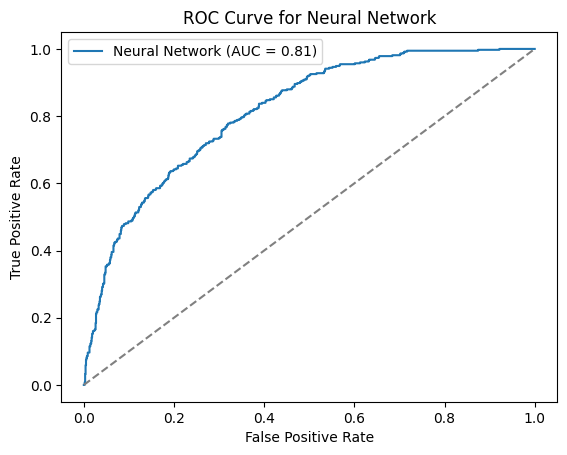

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.83      0.76      0.80      1035
        True       0.46      0.56      0.51       374

    accuracy                           0.71      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.71      0.72      1409



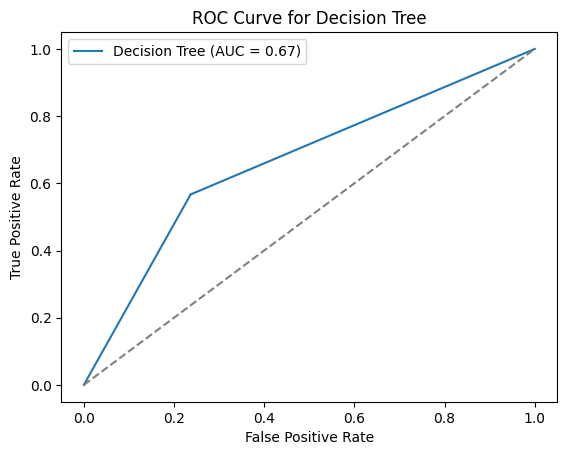

Model: Random Forest
              precision    recall  f1-score   support

       False       0.87      0.82      0.84      1035
        True       0.57      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.72      1409
weighted avg       0.79      0.78      0.78      1409



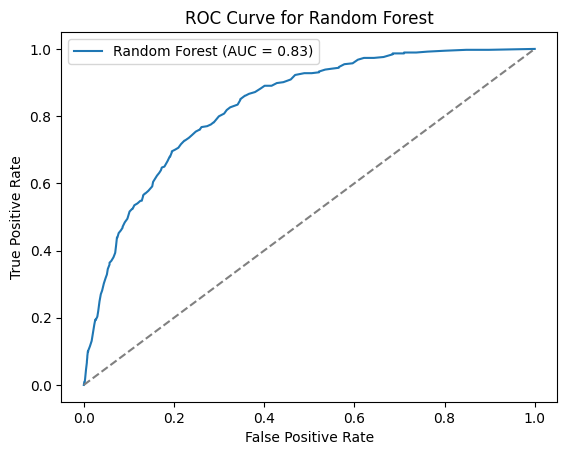

Model: SVM
              precision    recall  f1-score   support

       False       0.90      0.77      0.83      1035
        True       0.54      0.76      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



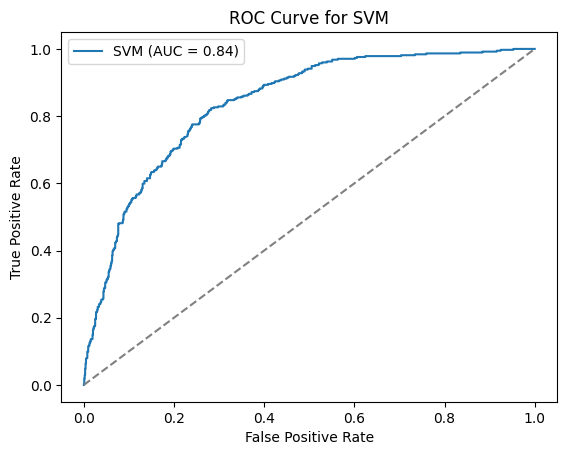

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

       False       0.86      0.80      0.83      1035
        True       0.54      0.65      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409



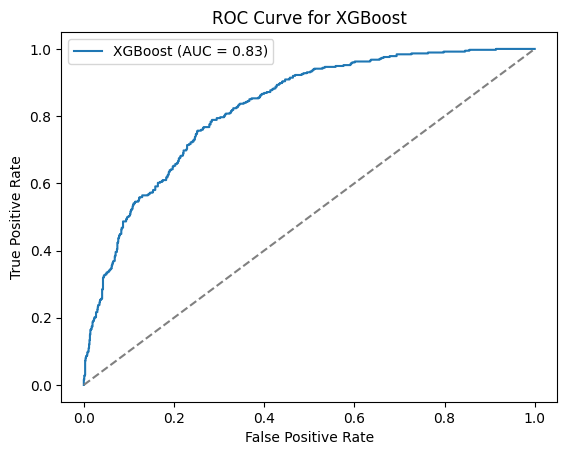

Model: KMeans
              precision    recall  f1-score   support

       False       0.68      0.72      0.70      1035
        True       0.06      0.05      0.05       374

    accuracy                           0.54      1409
   macro avg       0.37      0.38      0.38      1409
weighted avg       0.51      0.54      0.53      1409



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
              precision    recall  f1-score   support

       False       0.87      0.79      0.83      1035
        True       0.54      0.69      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



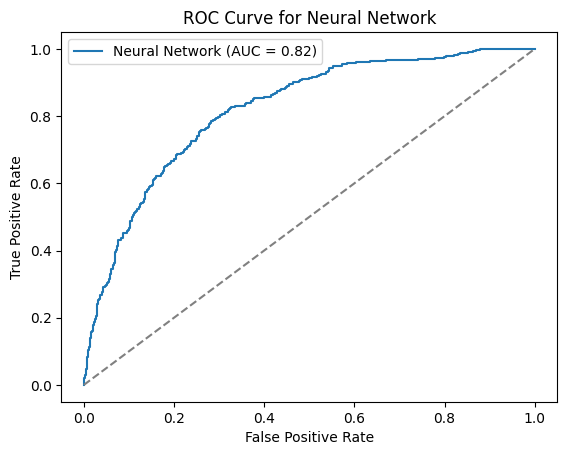

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.84      0.76      0.80      1035
        True       0.48      0.60      0.53       374

    accuracy                           0.72      1409
   macro avg       0.66      0.68      0.66      1409
weighted avg       0.74      0.72      0.73      1409



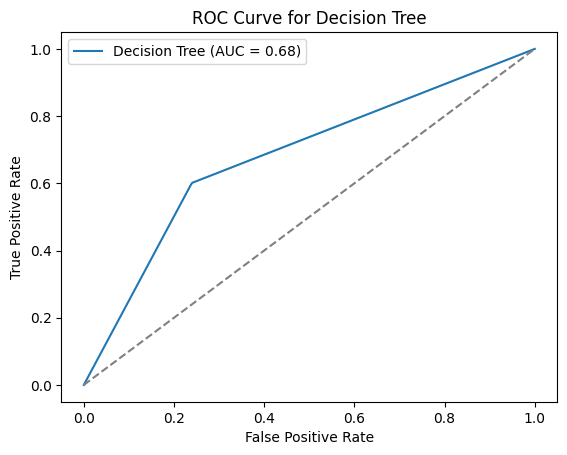

Model: Random Forest
              precision    recall  f1-score   support

       False       0.87      0.80      0.83      1035
        True       0.55      0.67      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.77      1409



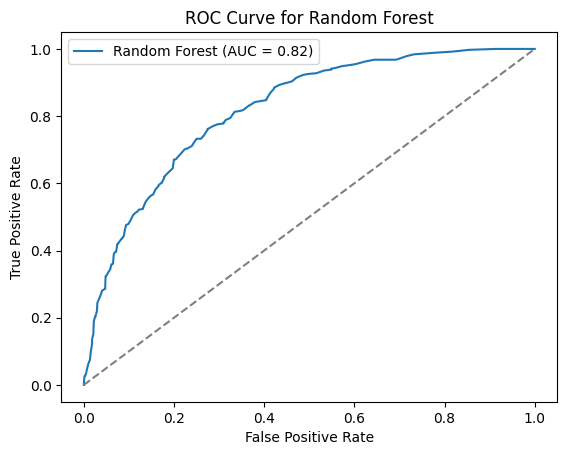

Model: SVM
              precision    recall  f1-score   support

       False       0.89      0.75      0.81      1035
        True       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.76      1409



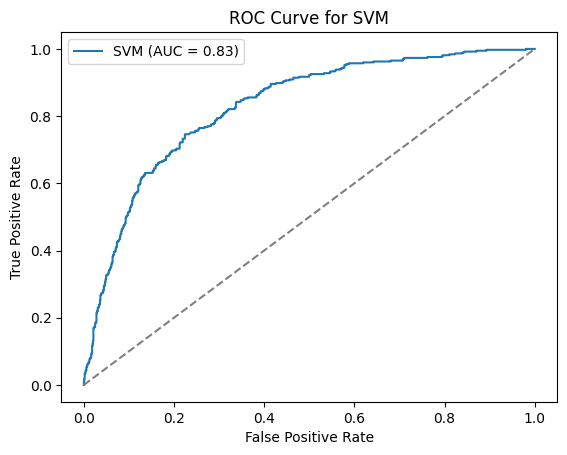

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:58:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

       False       0.86      0.78      0.82      1035
        True       0.52      0.66      0.58       374

    accuracy                           0.75      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.77      0.75      0.76      1409



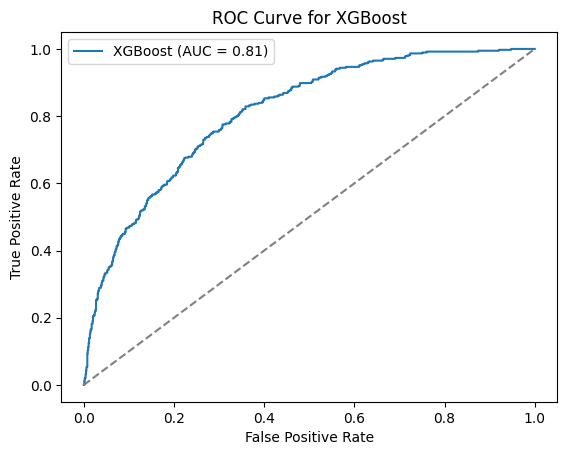

Model: KMeans
              precision    recall  f1-score   support

       False       0.69      0.75      0.72      1035
        True       0.07      0.05      0.06       374

    accuracy                           0.56      1409
   macro avg       0.38      0.40      0.39      1409
weighted avg       0.52      0.56      0.54      1409



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
              precision    recall  f1-score   support

       False       0.88      0.77      0.82      1035
        True       0.53      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409



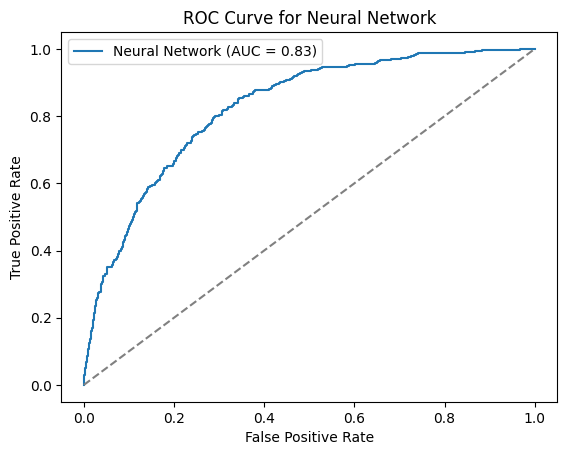

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.83      0.76      0.80      1035
        True       0.47      0.58      0.52       374

    accuracy                           0.71      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.71      0.72      1409



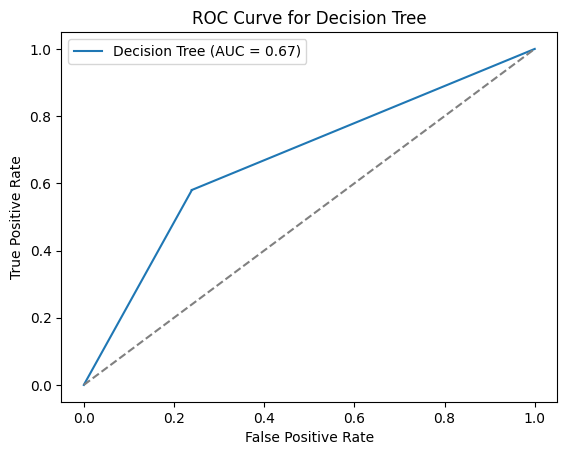

Model: Random Forest
              precision    recall  f1-score   support

       False       0.87      0.82      0.84      1035
        True       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



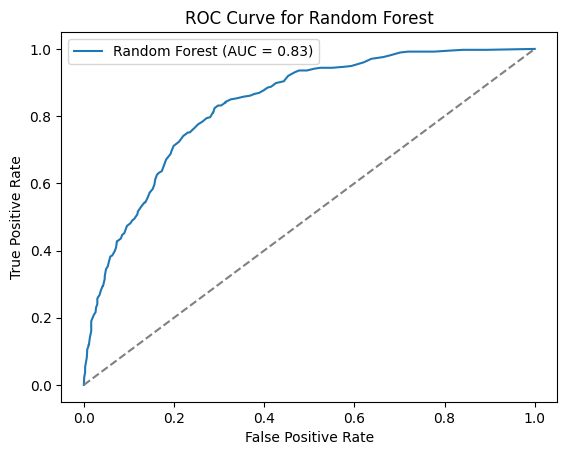

Model: SVM
              precision    recall  f1-score   support

       False       0.91      0.76      0.82      1035
        True       0.54      0.78      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



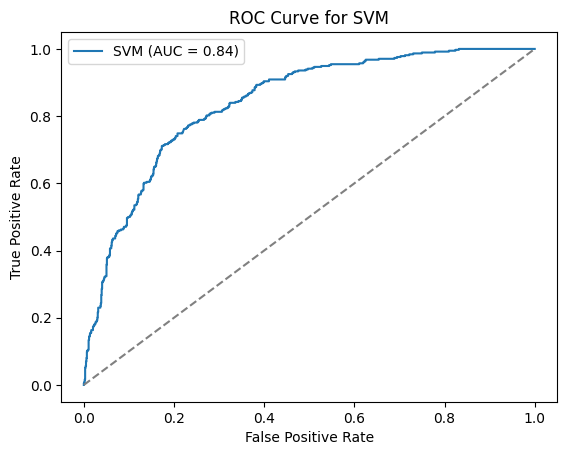

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:59:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

       False       0.87      0.81      0.84      1035
        True       0.55      0.66      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.77      1409



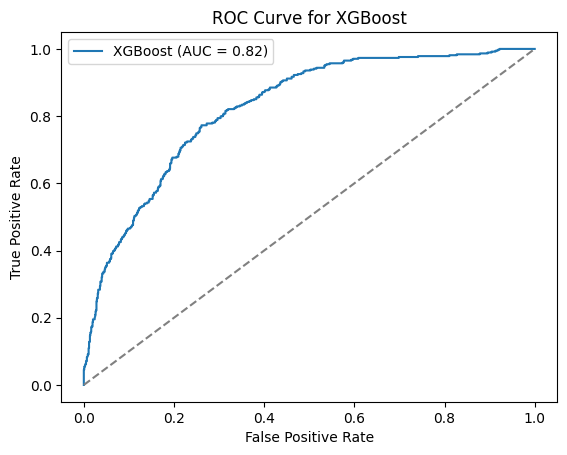

Model: KMeans
              precision    recall  f1-score   support

       False       0.92      0.26      0.41      1035
        True       0.31      0.94      0.47       374

    accuracy                           0.44      1409
   macro avg       0.62      0.60      0.44      1409
weighted avg       0.76      0.44      0.42      1409



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
              precision    recall  f1-score   support

       False       0.86      0.77      0.81      1035
        True       0.50      0.65      0.57       373

    accuracy                           0.74      1408
   macro avg       0.68      0.71      0.69      1408
weighted avg       0.76      0.74      0.75      1408



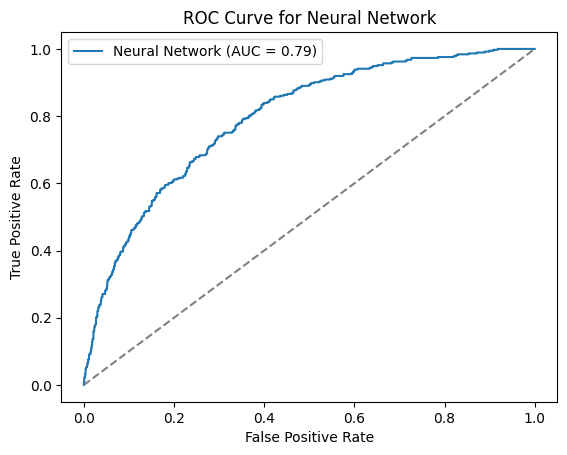

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.81      0.75      0.78      1035
        True       0.43      0.51      0.47       373

    accuracy                           0.69      1408
   macro avg       0.62      0.63      0.63      1408
weighted avg       0.71      0.69      0.70      1408



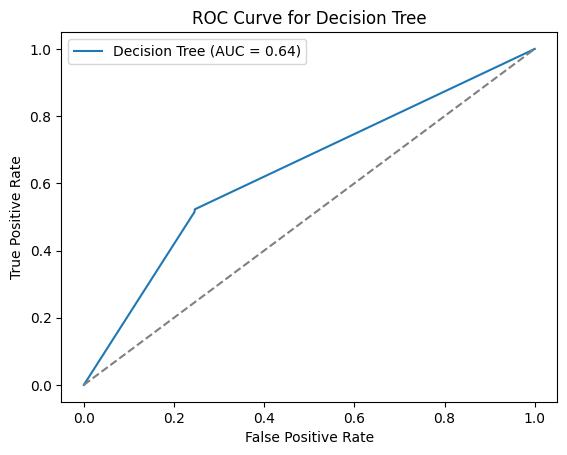

Model: Random Forest
              precision    recall  f1-score   support

       False       0.85      0.80      0.82      1035
        True       0.52      0.60      0.56       373

    accuracy                           0.75      1408
   macro avg       0.68      0.70      0.69      1408
weighted avg       0.76      0.75      0.75      1408



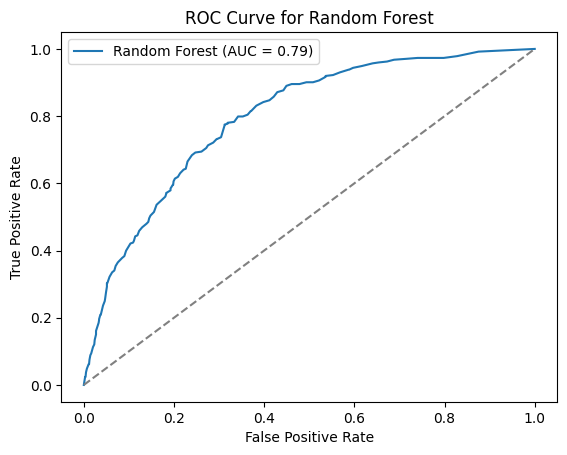

Model: SVM
              precision    recall  f1-score   support

       False       0.87      0.75      0.81      1035
        True       0.50      0.69      0.58       373

    accuracy                           0.74      1408
   macro avg       0.69      0.72      0.70      1408
weighted avg       0.77      0.74      0.75      1408



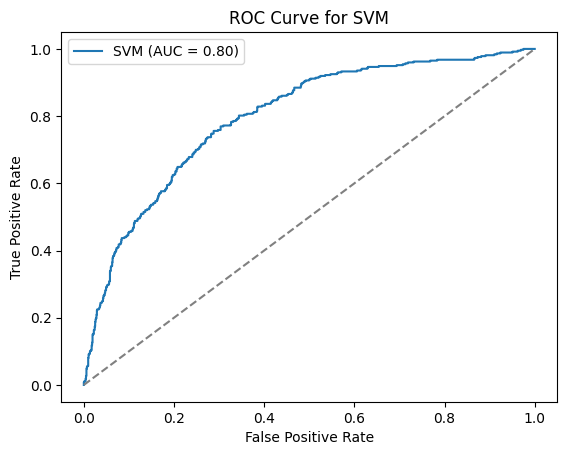

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:00:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

       False       0.85      0.79      0.82      1035
        True       0.51      0.62      0.56       373

    accuracy                           0.74      1408
   macro avg       0.68      0.71      0.69      1408
weighted avg       0.76      0.74      0.75      1408



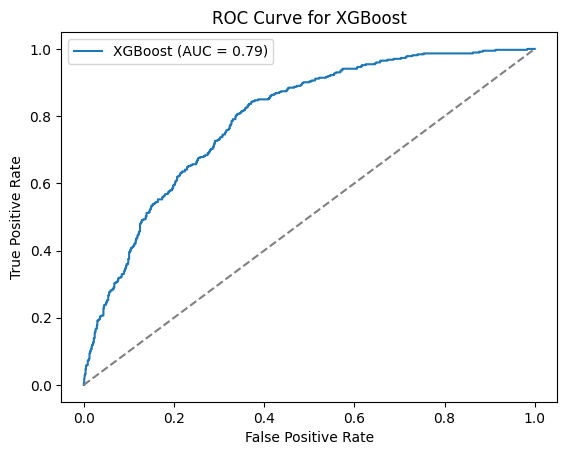

Model: KMeans
              precision    recall  f1-score   support

       False       0.90      0.28      0.43      1035
        True       0.31      0.92      0.47       373

    accuracy                           0.45      1408
   macro avg       0.61      0.60      0.45      1408
weighted avg       0.75      0.45      0.44      1408



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network
              precision    recall  f1-score   support

       False       0.86      0.76      0.81      1034
        True       0.50      0.65      0.56       374

    accuracy                           0.73      1408
   macro avg       0.68      0.71      0.69      1408
weighted avg       0.76      0.73      0.74      1408



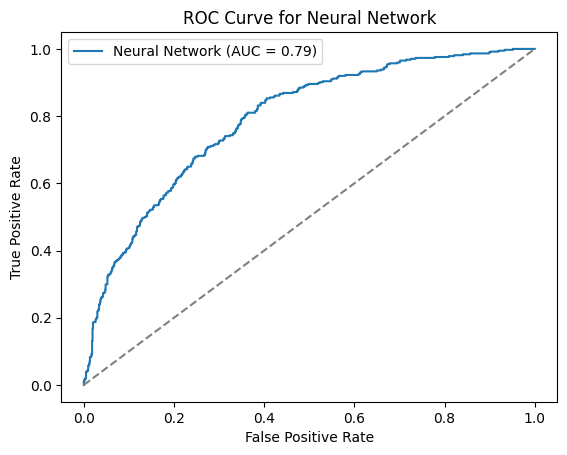

Model: Decision Tree
              precision    recall  f1-score   support

       False       0.84      0.78      0.81      1034
        True       0.49      0.58      0.53       374

    accuracy                           0.73      1408
   macro avg       0.67      0.68      0.67      1408
weighted avg       0.75      0.73      0.74      1408



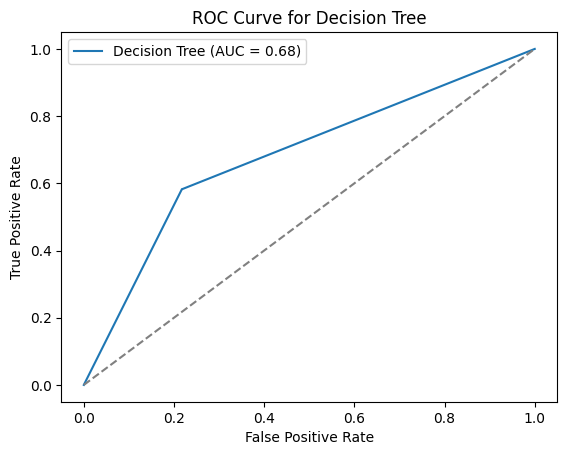

Model: Random Forest
              precision    recall  f1-score   support

       False       0.85      0.82      0.84      1034
        True       0.55      0.61      0.58       374

    accuracy                           0.77      1408
   macro avg       0.70      0.71      0.71      1408
weighted avg       0.77      0.77      0.77      1408



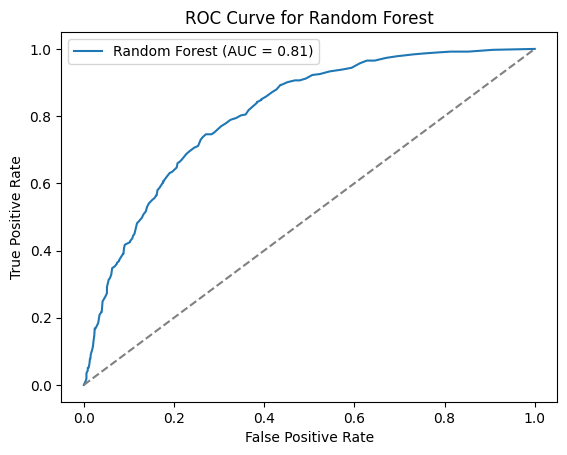

Model: SVM
              precision    recall  f1-score   support

       False       0.88      0.75      0.81      1034
        True       0.50      0.71      0.59       374

    accuracy                           0.74      1408
   macro avg       0.69      0.73      0.70      1408
weighted avg       0.78      0.74      0.75      1408



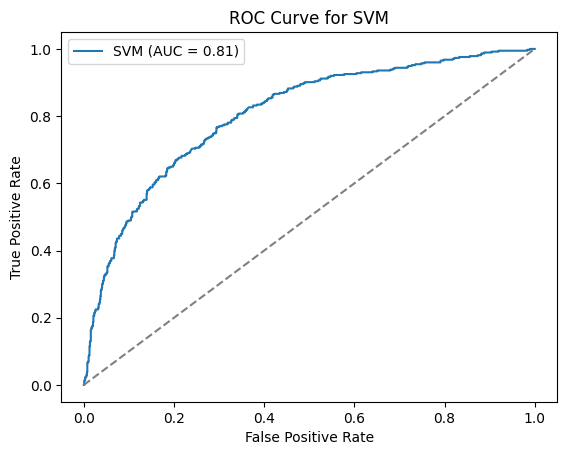

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
              precision    recall  f1-score   support

       False       0.86      0.81      0.84      1034
        True       0.55      0.64      0.59       374

    accuracy                           0.77      1408
   macro avg       0.71      0.73      0.71      1408
weighted avg       0.78      0.77      0.77      1408



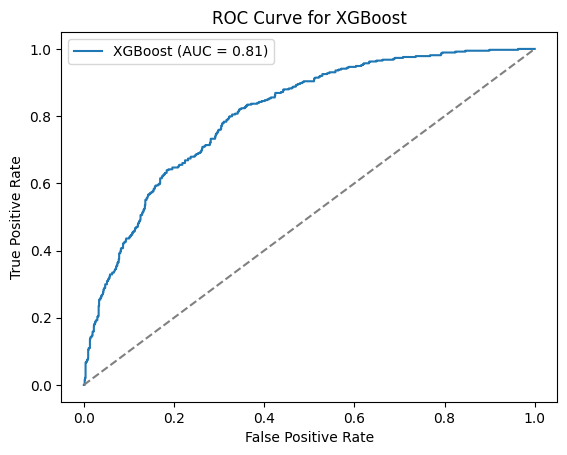

Model: KMeans
              precision    recall  f1-score   support

       False       0.94      0.29      0.45      1034
        True       0.33      0.94      0.48       374

    accuracy                           0.47      1408
   macro avg       0.63      0.62      0.47      1408
weighted avg       0.77      0.47      0.46      1408

             Model  Accuracy  Precision    Recall  F1-Score       AUC
15             SVM  0.762952   0.536765  0.780749  0.636166  0.840182
3              SVM  0.763662   0.538899  0.759358  0.630411  0.838527
14   Random Forest  0.777857   0.570439  0.660428  0.612144  0.834094
2    Random Forest  0.775727   0.567757  0.649733  0.605985  0.831218
9              SVM  0.750177   0.520221  0.756684  0.616558  0.827924
12  Neural Network  0.755855   0.529762  0.713904  0.608200  0.825679
4          XGBoost  0.759404   0.538631  0.652406  0.590085  0.825460
16         XGBoost  0.768630   0.553812  0.660428  0.602439  0.824831
6   Neural Network  0.762243 

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:00:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Final Test Set Performance:
              precision    recall  f1-score   support

       False       0.94      0.89      0.92       776
        True       0.74      0.85      0.79       281

    accuracy                           0.88      1057
   macro avg       0.84      0.87      0.85      1057
weighted avg       0.89      0.88      0.88      1057

Final Test AUC: 0.936


In [43]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, ClassifierMixin
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Example KMeans wrapper
class KMeansClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_clusters=2):
        self.kmeans = KMeans(n_clusters=n_clusters)

    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self

    def predict(self, X):
        return self.kmeans.predict(X)

# Data preparation
X = data.drop('Churn_Yes', axis=1)  # Features
y = data['Churn_Yes']  # Target

# Stratified KFold cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote = SMOTE(random_state=42)

# Store results
results = []

for train_idx, val_idx in skf.split(X, y):
    # Train-test split within the fold
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_val, y_val = X.iloc[val_idx], y.iloc[val_idx]

    # Apply SMOTE to handle class imbalance in the training data
    X_res, y_res = smote.fit_resample(X_train, y_train)

    # List of models to evaluate
    models = [
        ("Neural Network", MLPClassifier(random_state=42)),
        ("Decision Tree", DecisionTreeClassifier(random_state=42)),
        ("Random Forest", RandomForestClassifier(random_state=42)),
        ("SVM", SVC(probability=True, random_state=42)),
        ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)),
        ("KMeans", KMeansClassifier(n_clusters=2))
    ]

    for name, model in models:
        model.fit(X_res, y_res)  # Train the model with resampled data
        y_pred = model.predict(X_val)  # Make predictions
        y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='binary', zero_division=0)
        recall = recall_score(y_val, y_pred, average='binary', zero_division=0)
        f1 = f1_score(y_val, y_pred, average='binary', zero_division=0)
        auc = roc_auc_score(y_val, y_proba) if hasattr(model, "predict_proba") else None

        # Store the results
        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "AUC": auc
        })

        # Classification report
        print(f"Model: {name}")
        print(classification_report(y_val, y_pred))

        # Plot ROC curve
        if auc:
            fpr, tpr, _ = roc_curve(y_val, y_proba)
            plt.figure()
            plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")
            plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC Curve for {name}")
            plt.legend(loc="best")
            plt.show()

# Tabular summary of results
df_results = pd.DataFrame(results)
print(df_results.sort_values(by="AUC", ascending=False))

# Final evaluation on the test set for the best model (assuming XGBoost is the best)
best_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)  # Best model (XGBoost here)
best_model.fit(X_res, y_res)
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("Final Test Set Performance:")
print(classification_report(y_test, y_test_pred))
print(f"Final Test AUC: {roc_auc_score(y_test, y_test_proba):.3f}")
